# Database connection

In [2]:
import MySQLdb


def connect():
   user = "root"
   password = "mysqldb"
   host = "localhost"
   db = "reviews"

   try:
      db = MySQLdb.connect(user = user, passwd = password, db = db)
      return db, db.cursor()
   except:
      logging.error("Database connection error")
      raise
        


def execute_query(connector, query):
   results = int (connector.execute(query))
   cont = 0
   if results > 0:
      result1 = connector.fetchall()
      return result1
   else:
      return []
    

db, cursor = connect()

In [23]:
#Lists  issues table from opensrack code review (Reviews Data base)
query = """ select issue_id, old_value , changed_by as trackers, changed_on as date, timestampdiff(SECOND,min(changed_on),max(changed_on)) as timeDiff  
                   from reviews.changes where old_value!=""
                   group by issue_id, old_value """

In [24]:
data = execute_query(cursor, query)

# Importing data from MySQL to Pandas

In [25]:
data_list = list(data)

In [26]:
import pandas

pandas_ds = pandas.DataFrame(data_list, columns=["issue_id","old_value","trackers","date","timeDiff"])

pandas_ds.columns.values.tolist()

['issue_id', 'old_value', 'trackers', 'date', 'timeDiff']

In [27]:
pandas_ds

,issue_id,old_value,trackers,date,timeDiff
0,1,1,1,2015-01-20 12:54:22,4254
1,1,10,1,2015-02-10 16:26:03,61876
2,1,11,1,2015-02-11 09:51:18,157324
3,1,12,1,2015-02-13 14:18:42,1443711
4,1,13,1,2015-04-21 12:03:09,4608
5,1,14,1,2015-04-21 13:27:43,4871
6,1,15,1,2015-04-21 15:05:11,22923
7,1,16,1,2015-04-22 13:10:01,8059
8,1,17,18,2015-05-15 11:01:05,2999064
9,1,18,1,2015-05-27 15:47:12,677268


# How to access data in Pandas

In [8]:
timeDiff = pandas_ds["timeDiff"]

In [9]:
#Some statistics about the data
print "Mean time to close a patchset: %f hours" % (timeDiff.mean()/3600.0)
print "Median time to close a patchset: %f hours" % (timeDiff.median()/3600.0)
print "Quantiles: "
print timeDiff.quantile([0.25, 0.5, 0.75])

Mean time to close a patchset: 92.648011 hours
Median time to close a patchset: 3.803472 hours
Quantiles: 
0.25      1939.00
0.50     13692.50
0.75    158107.75
Name: timeDiff, dtype: float64


Populating the interactive namespace from numpy and matplotlib


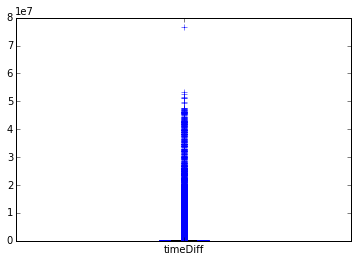

In [11]:
# And we can also create some charts
%pylab inline
# Boxplots
pandas_ds["timeDiff"].plot(kind="box")

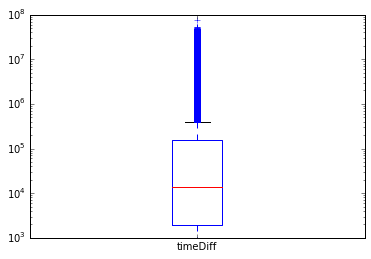

In [13]:
# Boxplots with logaritmic scale
pandas_ds["timeDiff"].plot(kind="box", logy=True)

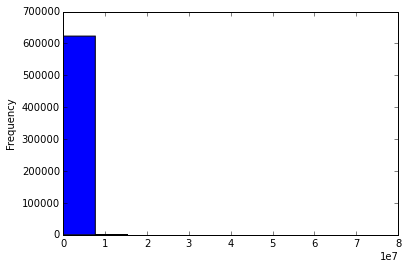

In [12]:
# Histograms
pandas_ds["timeDiff"].plot(kind="hist")

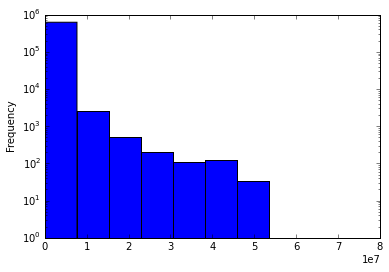

In [15]:
# Boxplots without logaritmic scale
pandas_ds["timeDiff"].plot(kind="hist", logy=True)

In [22]:
# unique list of trackers
pandas_ds.trackers.unique()[:10]
# same resulta as using pandas_ds["gerrit_tracker"].nunique()


array([ 1, 18, 20, 29, 30, 33, 26, 31, 28, 39])

# Filters in Pandas

In [28]:
#Let's focus on data from 2015
data_2015 = pandas_ds[pandas_ds["date"] >= '2015-01-01'];
data_2015

,issue_id,old_value,trackers,date,timeDiff
0,1,1,1,2015-01-20 12:54:22,4254
1,1,10,1,2015-02-10 16:26:03,61876
2,1,11,1,2015-02-11 09:51:18,157324
3,1,12,1,2015-02-13 14:18:42,1443711
4,1,13,1,2015-04-21 12:03:09,4608
5,1,14,1,2015-04-21 13:27:43,4871
6,1,15,1,2015-04-21 15:05:11,22923
7,1,16,1,2015-04-22 13:10:01,8059
8,1,17,18,2015-05-15 11:01:05,2999064
9,1,18,1,2015-05-27 15:47:12,677268


In [31]:
# Or let's focus on data coming from the issue 56
issue_56 = pandas_ds[pandas_ds["old_value"] == '56'];
issue_56

,issue_id,old_value,trackers,date,timeDiff
928,97,56,35,2015-11-02 04:58:36,4481
2354,221,56,35,2015-08-27 03:35:33,5006
3501,401,56,43,2015-07-17 16:35:36,387406
6983,929,56,227,2015-08-14 08:56:59,1332931
12935,1964,56,48,2015-01-29 21:25:56,34452
14246,2175,56,48,2014-12-12 04:53:20,1515886
15746,2480,56,695,2014-11-13 01:25:27,6024401
24553,4197,56,48,2014-09-09 21:21:14,68239
24888,4230,56,223,2014-01-07 17:27:44,72812
32562,5550,56,762,2014-02-26 14:57:03,4649456


In [32]:
# What about issue 56 data in 2015?
issue_56_2015 = pandas_ds[(pandas_ds["date"] >= '2015-01-01') & (pandas_ds["old_value"] == '56')];
issue_56_2015

,issue_id,old_value,trackers,date,timeDiff
928,97,56,35,2015-11-02 04:58:36,4481
2354,221,56,35,2015-08-27 03:35:33,5006
3501,401,56,43,2015-07-17 16:35:36,387406
6983,929,56,227,2015-08-14 08:56:59,1332931
12935,1964,56,48,2015-01-29 21:25:56,34452
85862,19938,56,1791,2015-04-02 05:17:13,51961
95301,23038,56,2002,2015-03-26 19:59:30,42272
95368,23041,56,2002,2015-01-21 15:47:39,573233
95467,23042,56,2015,2015-03-06 11:16:15,0
95668,23047,56,2002,2015-01-14 12:51:14,0


# Grouping in Pandas

In [37]:
# Let's group by issue_id
pandas_ds.groupby("issue_id").agg({"trackers" : pandas.Series.nunique})

,trackers
issue_id,
1,2
2,1
3,1
4,1
5,1
6,2
7,1
8,1
9,1


In [48]:
import numpy as np
pandas_ds.groupby("old_value").agg({"trackers" : pandas.Series.nunique,
                                "timeDiff": np.mean })

,timeDiff,trackers
old_value,,
1,241978,4850
10,387496,1852
100,3545943,13
101,3928899,12
102,3934864,12
103,3913872,12
104,4103039,11
105,4095909,11
106,4675942,9


# TimeSeries

In [50]:
# Playing with timeseries
pandas_ts = pandas_ds.set_index("date").resample('M', how=pandas.Series.mean)

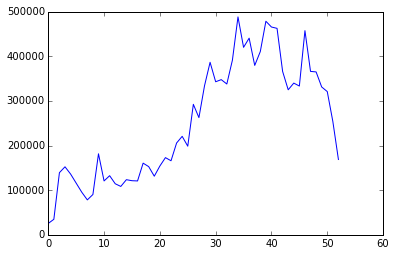

In [51]:
plot(pandas_ts["timeDiff"])